In [30]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()



In [15]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

In [27]:
gene_hit_anc_df = p.read_csv(f'{home_dir}/data/WGS/intermediate_files/EvolvingFront_WGS_RepeatHitGenes_byAncestor.csv',index_col=0)

all_ancs = gene_hit_anc_df.groupby('gene',as_index=False).sum()

putative_causal_genes = all_ancs[all_ancs['count']>2].sort_values(['count','gene'],ascending=[False,True])['gene'].values


In [28]:
putative_causal_genes

array(['KSP1', 'PUF3', 'PAB1', 'RTG2', 'CIT1', 'ARO80', 'GSH1', 'MKS1',
       'SSK2', 'MKT1', 'MIT1', 'GPB2', 'KGD1', 'MAE1', 'MDH1', 'TDA2',
       'TFA1', 'AIM17', 'ATG26', 'IRA1', 'IRA2', 'PLB3', 'VPS53',
       'YGR283C', 'YPK9'], dtype=object)

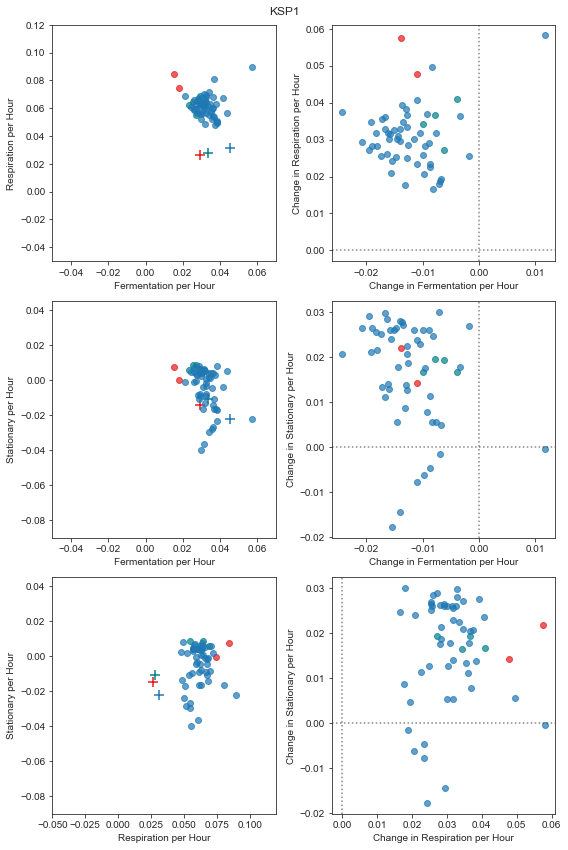

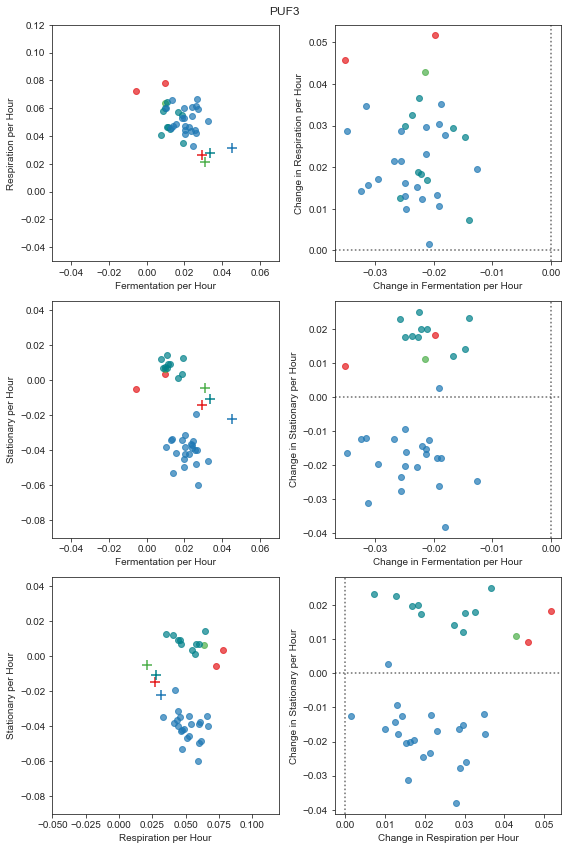

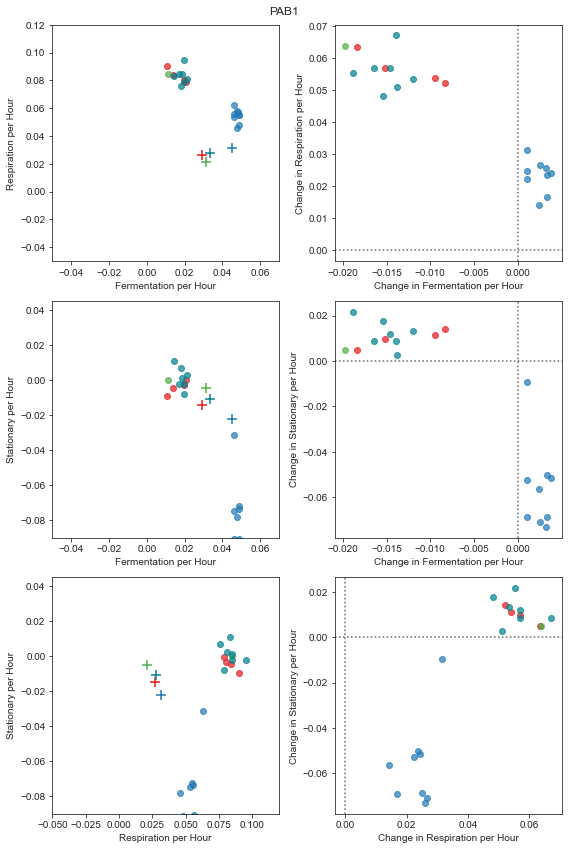

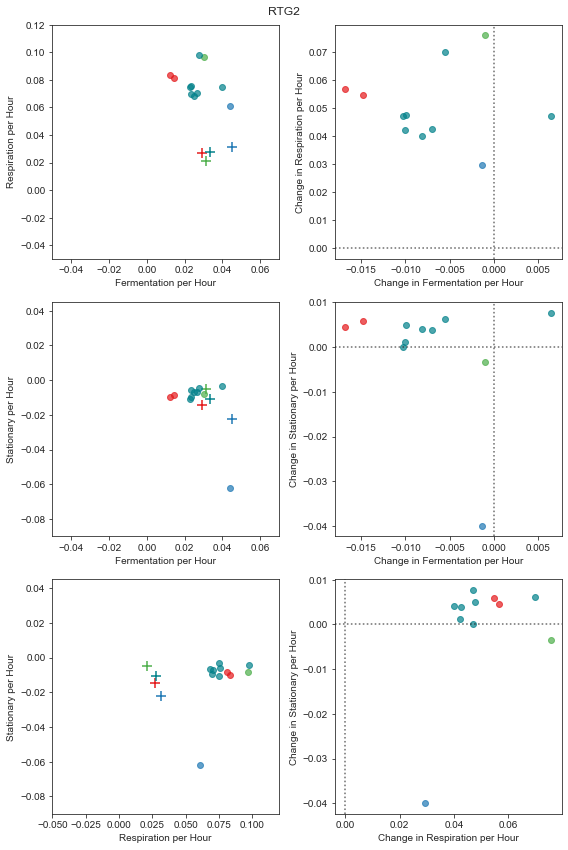

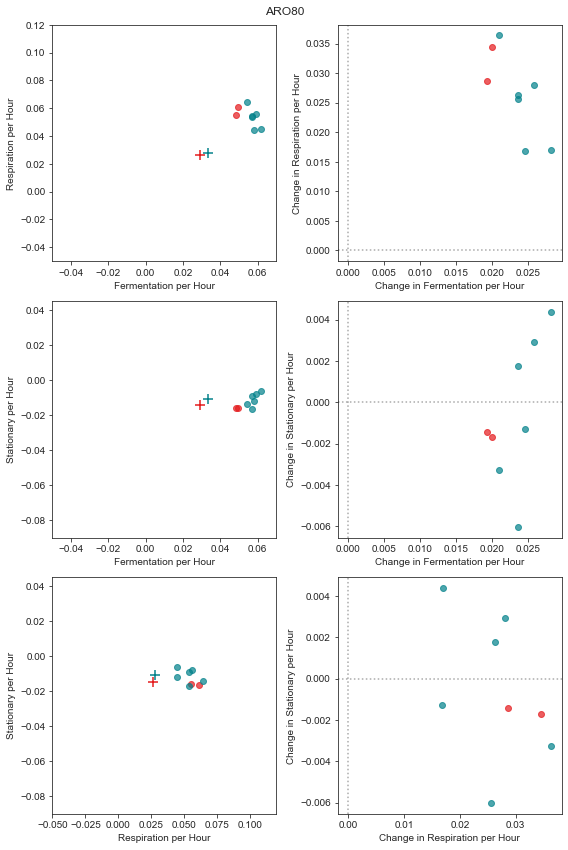

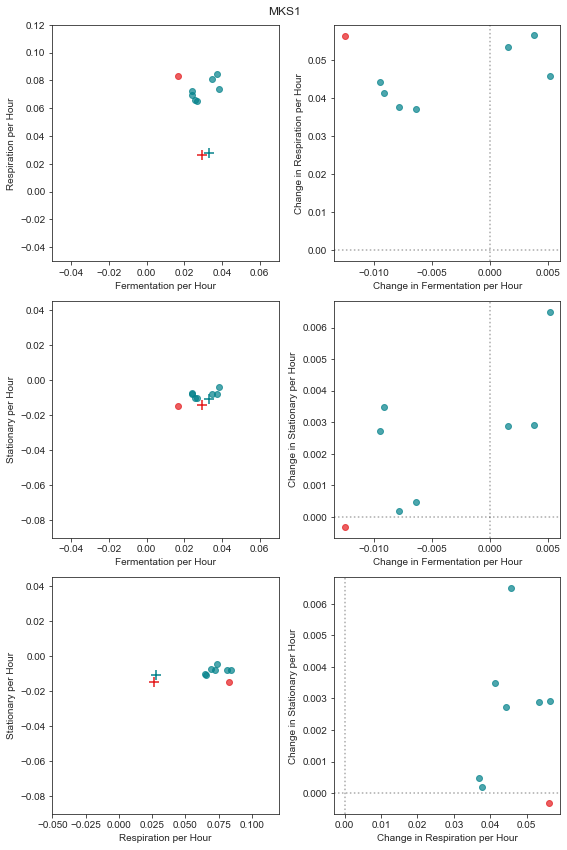

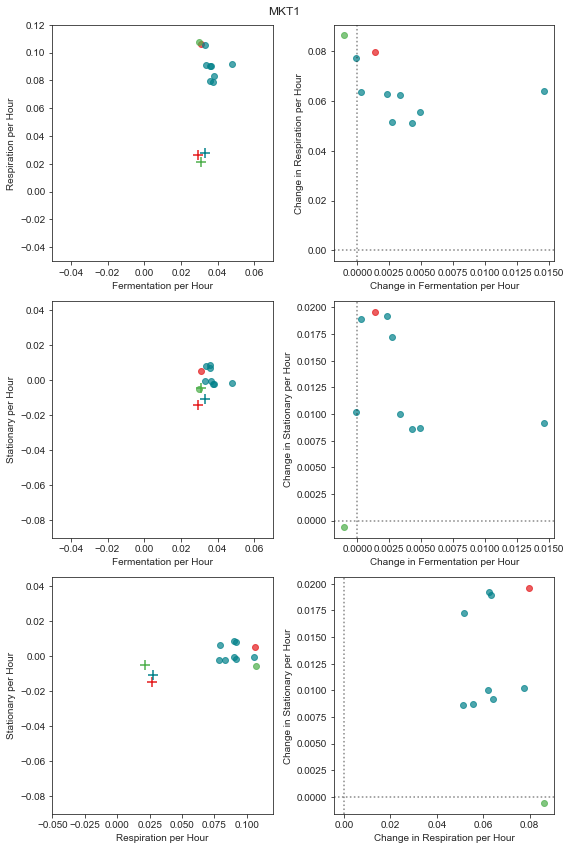

In [62]:

this_study = merged_fitness[merged_fitness['source_publication']=='This_study']

labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}


for causal_gene in putative_causal_genes:
    
    this_gene = this_study[this_study['gene']==causal_gene]
    
    ancestors_with_gene = np.unique(this_gene['ancestor'].values)
    
#     if len(th)
    
    if (len(ancestors_with_gene) > 1) and (len(this_gene)>4):
        
        plt.figure(figsize=(8,12))
        plt.suptitle(causal_gene)
        
        for count,(xdata,ydata) in enumerate(combinations(['FerPerHour','ResPerHour','StaPerHour'],2)):
            
    
            for ancestor in ancestors_with_gene:
                
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancestor]]

                plt.subplot(3,2,2*count+1)
                    
                plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[ancestor],s=100)
                
                this_anc = this_gene[this_gene['ancestor']==ancestor]

                plt.scatter(this_anc[xdata].values,this_anc[ydata].values,
                            color=tools.anc_color_map[ancestor],alpha=0.7)
                
                plt.xlim(lims[xdata][0],lims[xdata][1])
                plt.ylim(lims[ydata][0],lims[ydata][1])

                plt.xlabel(labels[xdata])
                plt.ylabel(labels[ydata])
                
                plt.subplot(3,2,2*count+2)
                
                differences = (this_anc[xdata].values-background_mutant[xdata].values,
                               this_anc[ydata].values-background_mutant[ydata].values)
                
                plt.scatter(differences[0],differences[1],
                            color=tools.anc_color_map[ancestor],alpha=0.7)
                
#                 plt.xlim(lims[xdata][0],lims[xdata][1])
#                 plt.ylim(lims[ydata][0],lims[ydata][1])

                plt.xlabel(f'Change in {labels[xdata]}')
                plt.ylabel(f'Change in {labels[ydata]}')
                
                plt.axhline(color='k',linestyle=':',alpha=0.2)
                plt.axvline(color='k',linestyle=':',alpha=0.2)
                
        plt.tight_layout()
        plt.savefig(f'{home_dir}/figures/analysis/same_direction/same_direction_{causal_gene}.pdf',bbox_inches='tight')


In [63]:
this_anc[['FerPerHour','ResPerHour','StaPerHour']].values-background_mutant[['FerPerHour','ResPerHour','StaPerHour']].values

array([[ 3.30837572e-03,  6.22306529e-02,  1.00466654e-02],
       [ 4.28096131e-03,  5.11068658e-02,  8.61945855e-03],
       [ 4.89514972e-03,  5.56872981e-02,  8.68982339e-03],
       [-9.72730181e-05,  7.74426389e-02,  1.02288142e-02],
       [ 2.55642596e-04,  6.35367259e-02,  1.89179531e-02],
       [ 2.36529507e-03,  6.26612133e-02,  1.91985635e-02],
       [ 2.72981037e-03,  5.14844252e-02,  1.72713678e-02],
       [ 1.46581625e-02,  6.40282551e-02,  9.19261690e-03]])

array([0.01819419, 0.01540216])

In [46]:
this_anc[ydata].values

array([0.07436861, 0.08427233])

In [47]:
background_mutant[xdata].values

array([0.0292475])